In [1]:
from konlpy.tag import Komoran

komoran=Komoran()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [43]:
import pandas as pd
import os
import numpy as np
def RS_POS_tag(x):
    rs=pd.read_csv('/home/u1013/schtm_osy_lsm_kjh/Crawling_Dataset/{0}'.format(x),encoding='utf-8')
    rs=rs.drop('Unnamed: 0',axis=1)
    rs_text=np.array(rs.loc[:,'Text'].tolist())
    rs_pos_words=[]
    for i in range(len(rs)):
        rs_pos_words.append(komoran.pos(rs_text[i]))
    total_text=[]
    pos_text=[]
    keyword=['부동산정책']
    for j in range(len(rs)):
        text_list=rs_pos_words[j]
        for i in range(len(text_list)):
            if text_list[i][1] not in ('SF','SP','SS','SE','SO','SW') and text_list[i][0] not in keyword:
                pos_text.append(text_list[i][:])
        total_text.append(pos_text)
        pos_text=[]
    sub_pos=[]
    selected_pos=[]
    for j in range(len(total_text)):
        pos_list=total_text[j]
        for i in range(len(pos_list)):
            if pos_list[i][1] in ('NNG','NNP','MM','MAG'):
                sub_pos.append(pos_list[i][0])
    return sub_pos

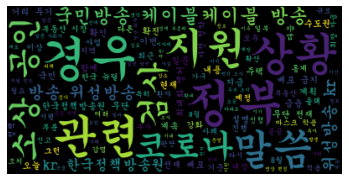

In [10]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = './gungsuh.ttf'

noun_text=''
for i in tag:
    noun_text=noun_text+' '+i
wordcloud=WordCloud(max_font_size=60,relative_scaling=.5,font_path=FONT_PATH).generate(noun_text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
tag=RS_POS_tag('한국경제TV_부동산정책.csv')

In [51]:
import pickle

with open('한국경제TV_부동산정책.txt','wb') as f:
    pickle.dump(tag,f)

In [52]:
with open('한국경제TV_부동산정책.txt','rb') as f:
    read=pickle.load(f)
    print(read)

['안철수', '국민의당', '대표', '오전', '서울', '여의도', '국회', '최고', '위원', '회의', '모두', '발언', '사진', '뉴스1', '안철수', '국민의당', '대표', '사진', '김현미', '국토', '교통부', '장관', '부동산', '정책', '책임자', '해임', '요구', '안철수', '대표', '최고', '위원', '회의', '야구', '어떤', '타자', '내리', '타수', '안타', '기록', '타자', '대타', '기본', '문재인', '정부', '부동산', '정책', '차례', '집값', '폭등', '김현미', '장관', '관련', '기사', '대로', '인상', '너무', '종부', '세율', '당정', '이견', '박병석', '서초', '아파트', '못', '판다', '다', '주택', '투기', '여권', '사정', '변명', '보완책', '압박', '금융', '위', '전화', '청약', '당첨자', '식후', '땡', '부동산', '집', '정부', '내일', '부동산', '세제', '대책', '발표', '부동산', '주식', '영', '끌', '투자', '올해', '가계', '대출', '증가', '폭', '역대', '최대', '부동산', '인', '국공', '악재', '지지', '반등', '30대', '상승', '주택', '김', '남국', '북한', '생각', '정도', '부동산', '규제', '김종인', '정부', '정책', '실패', '공직자', '부동산', '거론', '중', '내일', '다', '주택자', '종', '부세', '인상', '안', '발표', '내주', '국회', '제출', '예상', '안철수', '대표', '이', '정권', '집값', '핀셋', '규제', '결과', '흰머리', '못', '머리', '잔뜩', '문재인', '대통령', '겨냥', '3년', '부동산', '정책', '총체', '실패', '국민', '사과', '정책', '실패', '주역', '청와대', '정책실장',